In [30]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

def wlc(x, y, s, dt):
    if s == 0:
        x = x+dt
        y = y+dt
        if y >= 10:
            s = 1
            x = 0
        return x, y, s
    elif s == 1:
        x = x+dt
        y = y+dt
        if x >= 2:
            s = 2
        return x, y, s
    elif s == 2:
        x = x+dt
        y = y-2*dt
        if y <= 5:
            s = 3
            x = 0
        return x, y, s
    elif s == 3:
        x = x+dt
        y = y-2*dt
        if x >= 2:
            s = 0
        return x, y, s

num_steps = 479
def wlc_flow(x_0, y_0, s_0):
    dt = 0.05
    num_steps = 479
    tps = np.empty((num_steps+1, 3))  
    tps[0,1] = x_0
    tps[0,2] = y_0
    tps[0,0] = 0
    s = s_0
    noise = np.random.randn(num_steps+1)
    for i in range(1,num_steps+1):
        x, y, s = wlc(tps[i-1,1], tps[i-1,2], s, dt)
        tps[i,1] = x+0.001*noise[i-1]
        tps[i,2] = y+0.001*noise[i-1]
        tps[i,0] = tps[i-1,0]+dt
    return tps

N = 10
xs = [0 for i in range(N)]
for i in range(N):
    y_0 = 10*(i/N)
    xs[i] =  wlc_flow(0, y_0, 0)
list_traj = []
ns = int((num_steps+1)/24)
for i in range(N):
    for j in range(ns):
        list_traj.append(xs[i][j*ns:(j+1)*ns,:])
        
print(list_traj[0].shape)
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(20, 3)


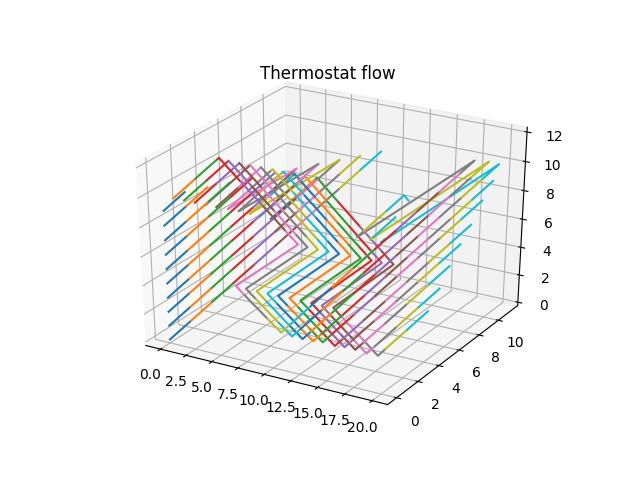

In [31]:
ax = plt.figure().add_subplot(projection='3d')
for i in range(0,len(list_traj)):
    ax.plot(*list_traj[i].T)
ax.set_title("Water level control flow")
plt.show()

In [32]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar


t2s = Traj2Sim()

load=False

if load == False:
    t2s.set_trajectories(list_traj)
    t2s.compute_mssd(verbose=False)
    t2s.save_bifilt(filename='wlc.npy')
if load == True:
    t2s.load_bifilt(filename='wlc.npy')

|████████████████████████████▉           | ▇▇▅ 14344/19900 [72%] in 6:05 (3 ▆▄▂ 39/19900 [0%] in 1s (43.8/s, ▂▂▄ 219/19900 [1%] in 5s (45.3/s (45.6/s ▃▁▃ 326/19900 [2%] in 7s (44.9/s ▇▅▃ 356/19900 [2%] in 8s (44.0/sin 15s (44.2/(44.1/ 758/19900 [4%] in 17s (43.9/828/19900 [4%] in 19s (43.5/ (43.7/▆█▆ 892/19900 [4%] in 20s (43.8/▆█▆ 951/19900 [5%] in 22s (43.6/▄▂▂ 969/19900 [5%] in 22s (43.4/ in 23s (43.4/(43.4 in 24s (43.5 (43.5▅▃▁ 1143/19900 [6%] in 26s (43.8 1148/19900 [6%] in 26s (43.8▃▅▇ 1282/19900 [6%] in 29s (44.2 ▇▇▅ 1359/19900 [7%] in 31s (44.51437/19900 [7%] in 32s (44.8 in 32s (44.8in 33s (44.9 ▃▁▃ 1565/19900 [8%] in 35s (44.91618/19900 [8%] in 36s (45.1 1706/19900 [9%] in 38s (45.4 ▇▅▃ 1802/19900 [9%] in 40s (45.5▇▅▃ 1866/19900 [9%] in 41s (45.7in 44s (46. (46.▂▂▄ 2081/19900 [10%] in 45s (46. 2094/19900 [11%] in 45s (46. in 46s (46.▇▇▅ 2114/19900 [11%] in 46s (46. (46.in 48s (46. ▅▃▁ 2306/19900 [12%] in 50s (46.2375/19900 [12%] in 51s (46.▅▇▇ 2448/19900 [12%] in 53s (46. 249

|████████████████████████████████████████| 19900/19900 [100%] in 8:35.9 (38▄▆█ 14389/19900 [72%] in 6:06 (3▄▂▂ 14412/19900 [72%] in 6:07 (3(3(3 14479/19900 [73%] in 6:09 (3▄▆█ 14488/19900 [73%] in 6:09 (3▄▂▂ 14566/19900 [73%] in 6:11 (3 ▇▇▅ 14630/19900 [74%] in 6:14 (3(3 14649/19900 [74%] in 6:14 (3 14658/19900 [74%] in 6:14 (3 ▄▆█ 14669/19900 [74%] in 6:15 (3 14675/19900 [74%] in 6:15 (3█▆▄ 14682/19900 [74%] in 6:15 (3▆▄▂ 14786/19900 [74%] in 6:18 (3 14791/19900 [74%] in 6:19 (3 ▄▆█ 14811/19900 [74%] in 6:19 (314843/19900 [75%] in 6:20 (3 in 6:22 (3 ▄▆█ 14902/19900 [75%] in 6:22 (3 14937/19900 [75%] in 6:23 (3 ▆█▆ 14954/19900 [75%] in 6:24 (3▇▇▅ 14960/19900 [75%] in 6:24 (314972/19900 [75%] in 6:24 (3▂▄▆ 14994/19900 [75%] in 6:25 (3 ▅▇▇ 15054/19900 [76%] in 6:27 (3 in 6:27 (3 in 6:29 (3 15158/19900 [76%] in 6:30 (3 in 6:35 (3▂▄▆ 15401/19900 [77%] in 6:37 (3 15454/19900 [78%] in 6:39 (3in 6:40 (3 ▇▅▃ 15539/19900 [78%] in 6:41 (3█▆▄ 15577/19900 [78%] in 6:42 (3 in 6:43 (3in 6:44 (315650

(20, 200, 200)


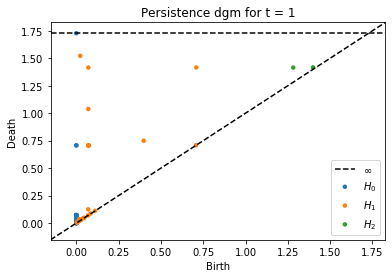

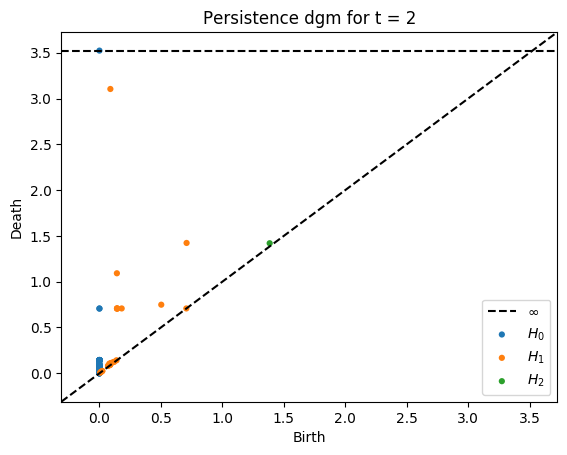

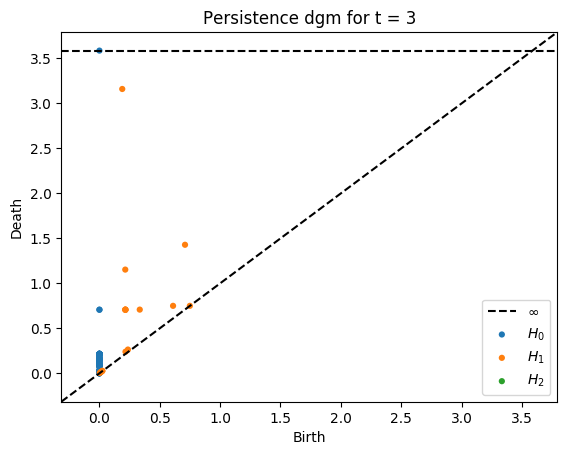

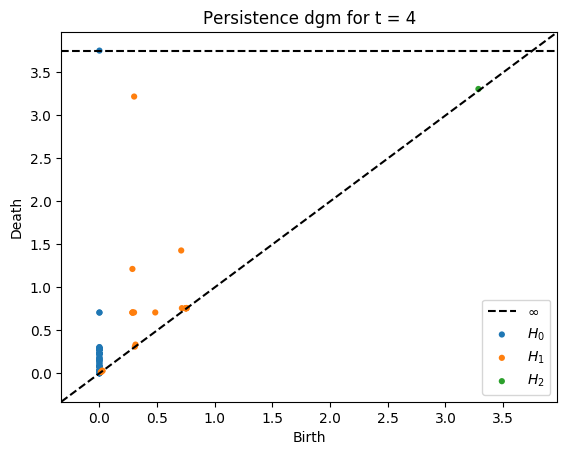

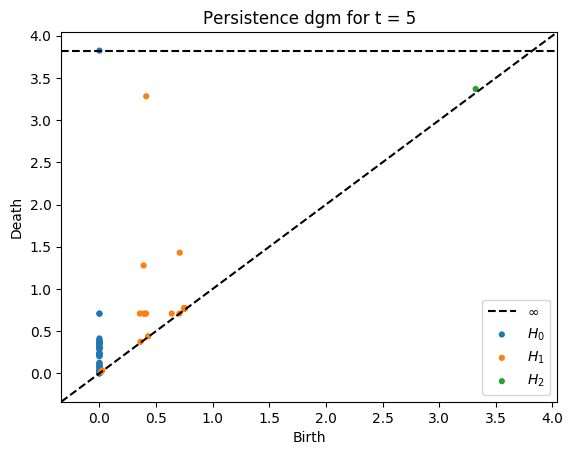

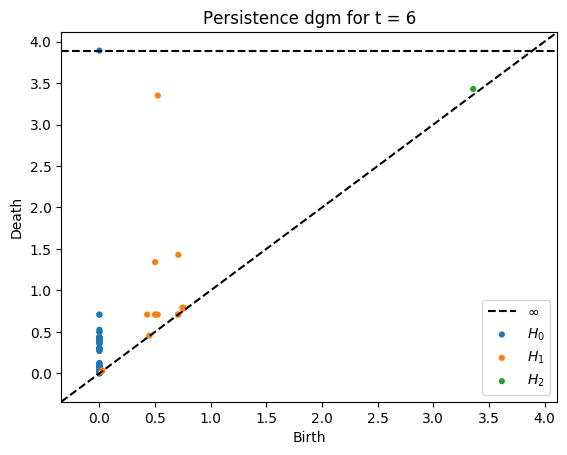

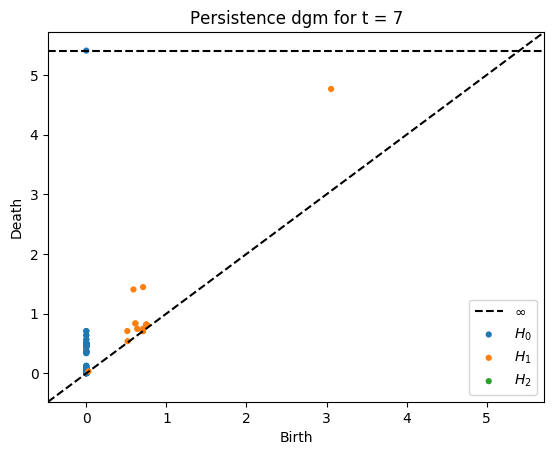

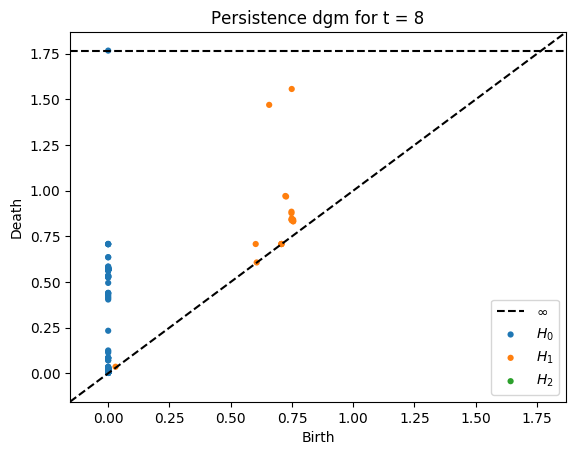

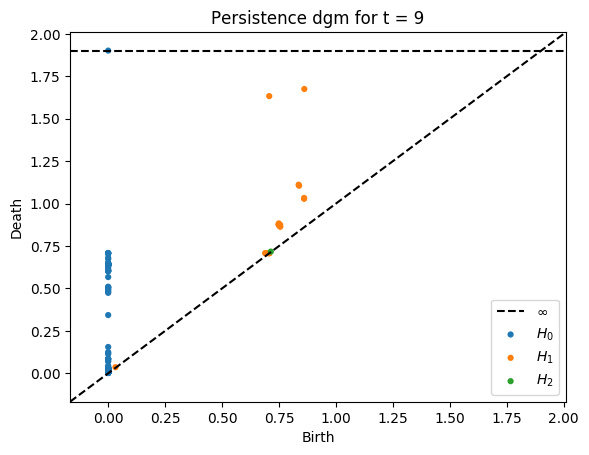

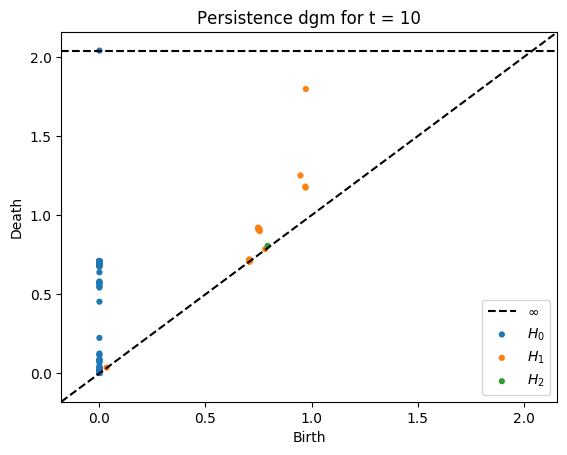

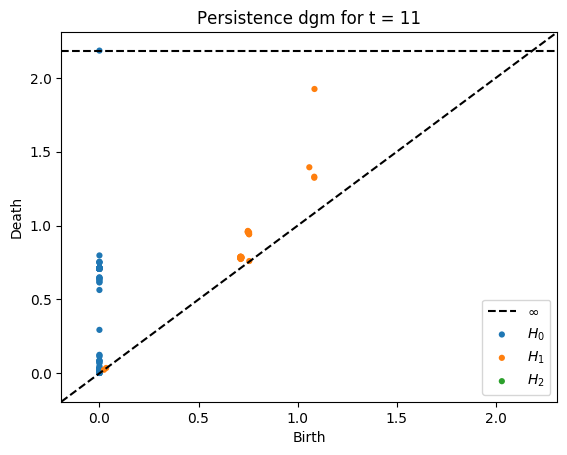

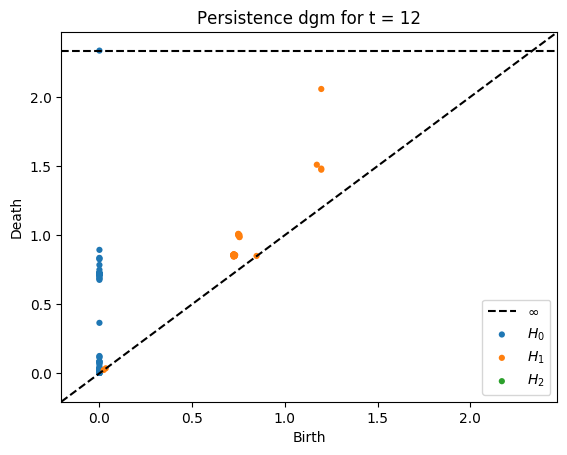

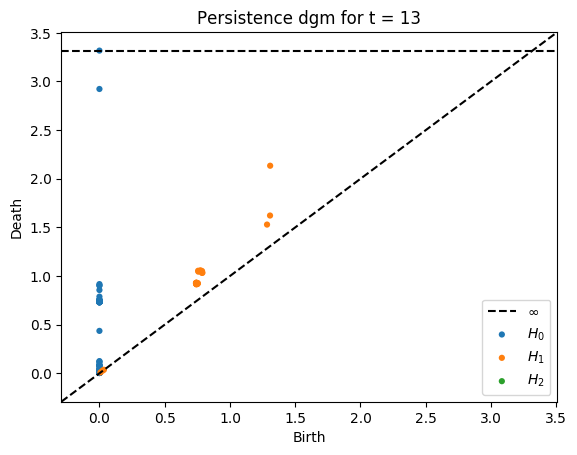

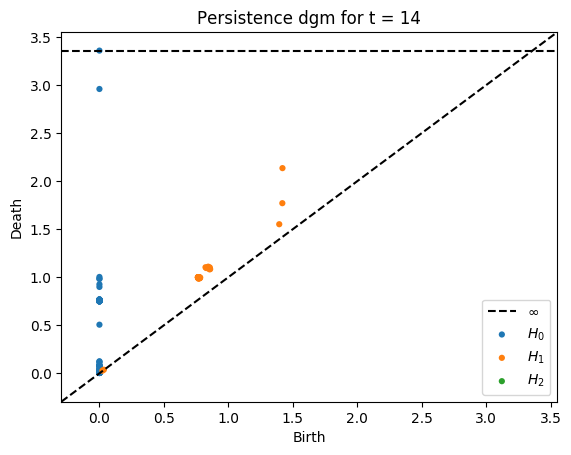

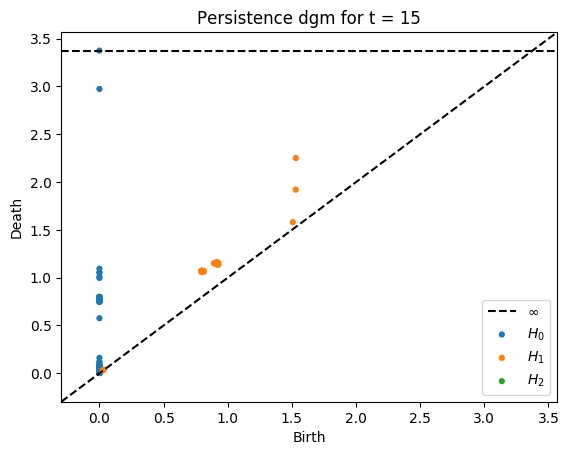

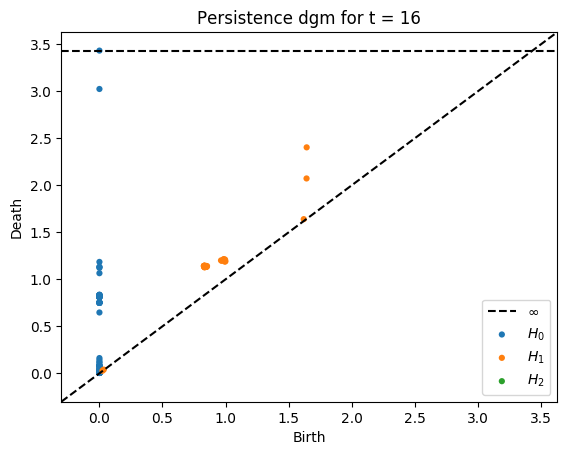

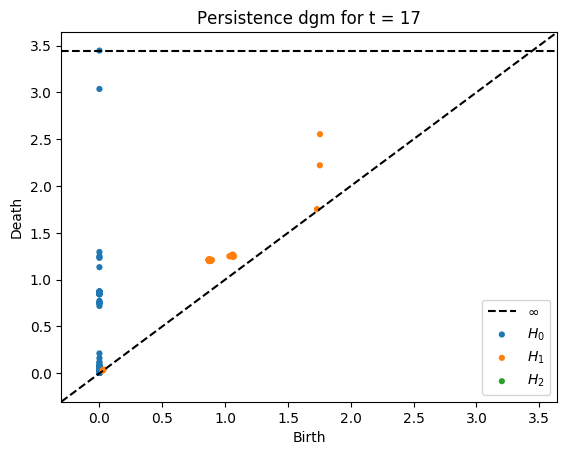

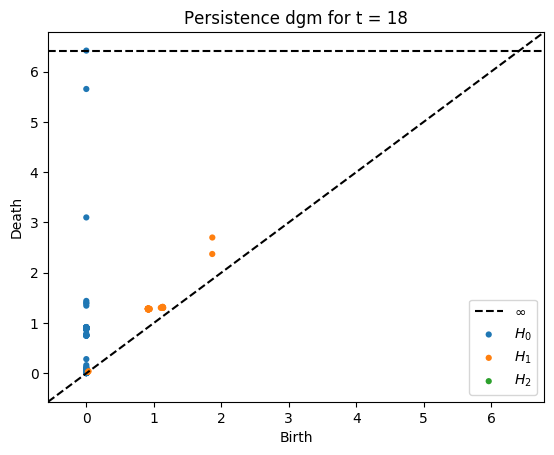

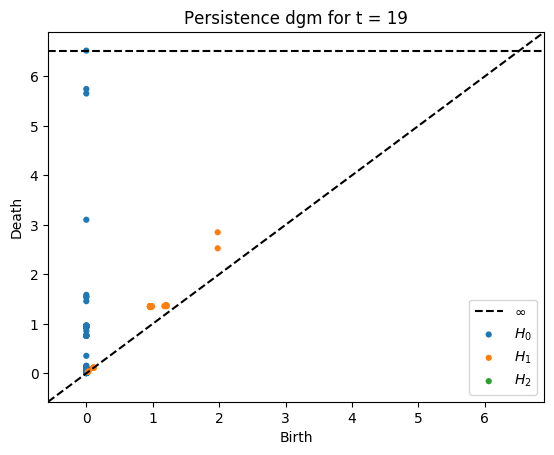

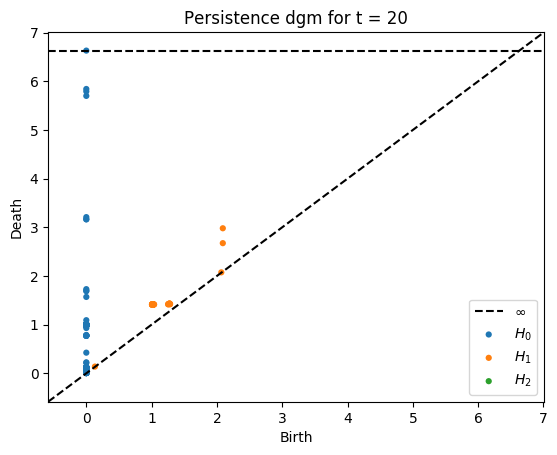

In [33]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

print(t2s.bifilt.shape)

for i in range(t2s.bifilt.shape[0]):
    dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(i+1))
    plot_diagrams(dgms, show = True)